In [2]:
import pandas as pd

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv') # 게임조사자료 불러오기 
df = df.drop('Unnamed: 0', axis = 1)

df_sales_list = df.columns[5:]

df.head()


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [3]:
!pip install scipy --upgrade

     |████████████████████████████████| 28.5 MB 50 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [4]:
# Sales 컬럼에서 문자열(M이나 K도)을 숫자형으로 처리하기

for i in df_sales_list: 

    for j in range(len(df.index) - 1):

        if 'K' in df.loc[j, i]:

            s = df.loc[j, i].replace('K', '*1000')
            s = s.split('*')
            s = float(s[0]) * int(s[1])

            df.loc[j, i] = s


        elif 'M' in df.loc[j, i]:

            s = df.loc[j, i].replace('M', '*1000000')
            s = s.split('*')
            s = float(s[0]) * int(s[1])

            df.loc[j, i] = s

        else: 

            s = df.loc[j, i]
            df.loc[j, i] = float(s)

In [5]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [6]:
# 결측치 제거, 이상한 값 수정, 연도별 정렬

df = df.dropna().reset_index().drop('index', axis = 1)

for i in range(len(df['Year'])):

    if (df.loc[i, 'Year'] >= 0 and df.loc[i, 'Year'] <= 21):

        df.loc[i, 'Year'] = df.loc[i, 'Year'] + 2000

    elif (df.loc[i, 'Year'] > 21 and df.loc[i, 'Year'] < 100):

        df.loc[i, 'Year'] = df.loc[i, 'Year'] + 1900

df = df.sort_values(by = ['Year'], axis = 0)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
13958,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0,0.01
5604,Asteroids,2600,1980.0,Shooter,Atari,4,0.26,0,0.05
14691,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0,0.03
9045,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0,0
12859,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0,0


In [7]:
# 지역별 Sales float로 수정 및 연도별, 지역별 Sales 합산

df['Year_Bining'] = pd.cut(df['Year'], bins = [1979, 1990, 2000, 2010, 2020])
df['NA_Sales'] = df['NA_Sales'].astype('float')
df['EU_Sales'] = df['EU_Sales'].astype('float')
df['JP_Sales'] = df['JP_Sales'].astype('float')
df['Other_Sales'] = df['Other_Sales'].astype('float')

df_Year_geo_game_sales_scale = df

pie_1980 = pd.DataFrame(df_Year_geo_game_sales_scale.groupby('Year_Bining').NA_Sales.sum())
pie_1990 = pd.DataFrame(df_Year_geo_game_sales_scale.groupby('Year_Bining').EU_Sales.sum())
pie_2000 = pd.DataFrame(df_Year_geo_game_sales_scale.groupby('Year_Bining').JP_Sales.sum())
pie_2010 = pd.DataFrame(df_Year_geo_game_sales_scale.groupby('Year_Bining').Other_Sales.sum())

pie_chart = pd.concat([pie_1980, pie_1990, pie_2000, pie_2010], axis = 1)
pie_chart['Year_sum'] = pie_chart['NA_Sales'] + pie_chart['EU_Sales'] + pie_chart['JP_Sales'] + pie_chart['Other_Sales']

pie_chart

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_sum
Year_Bining,,,,,
"(1979, 1990]",520260.14,1.100387e+05,117.37,210008.31,8.404245e+05
"(1990, 2000]",15430628.23,5.350322e+06,12120387.12,570056.88,3.347139e+07
"(2000, 2010]",35252566.20,1.596136e+07,6390513.91,4270504.73,6.187494e+07
"(2010, 2020]",23390777.88,1.291064e+07,1450233.03,2380206.02,4.013186e+07


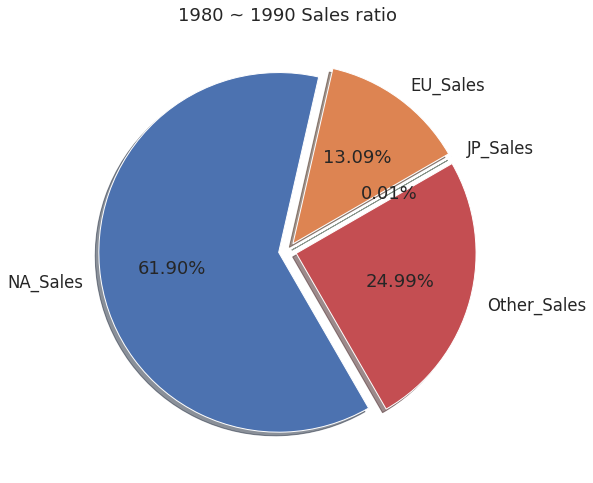

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)

ratio_1980 = pie_chart.iloc[0, 0:4] / pie_chart.iloc[0, 4] * 100
labels = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
explode = [0.05, 0.05, 0.05, 0.05]

plt.pie(ratio_1980, labels = labels, autopct='%.2f%%', startangle=300, counterclock=False, explode=explode, shadow=True)
plt.title('1980 ~ 1990 Sales ratio')
plt.show()
# 1980~1990 출고량 비율을 보면 NA 지역이 약 62%로 가장 많은 지역을 차지하는 것을 볼 수 있다.

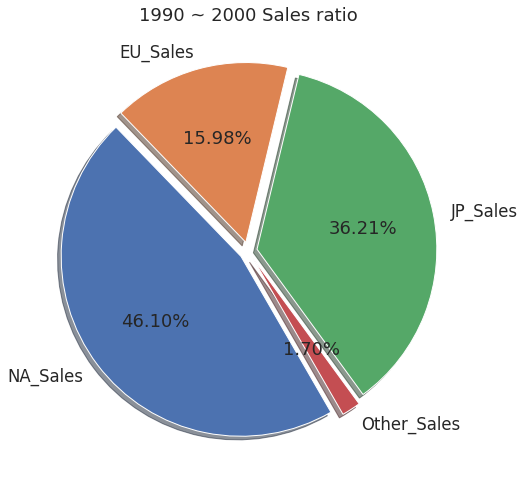

In [9]:
ratio_1990 = pie_chart.iloc[1, 0:4] / pie_chart.iloc[1, 4] * 100
labels = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
explode = [0.05, 0.05, 0.05, 0.05]

plt.pie(ratio_1990, labels = labels, autopct='%.2f%%', startangle=300, counterclock=False, explode=explode, shadow=True)
plt.title('1990 ~ 2000 Sales ratio')
plt.show()
# 1990~2000 출고량 비율을 보면 가장 많이 차지하는 지역이 NA이고, JP가 이전 연도와 비교했을 때 많이 성장한 것을 볼 수 있다.

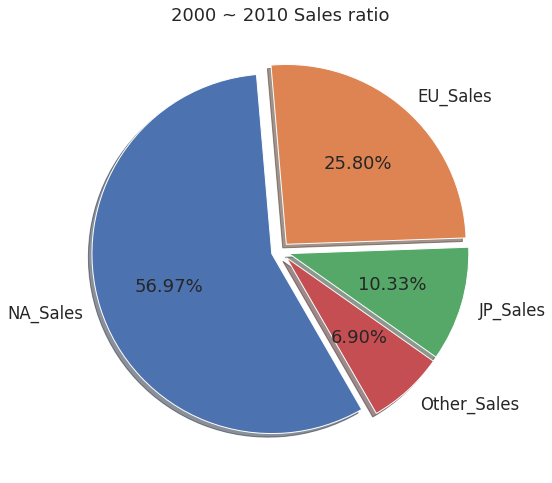

In [10]:
ratio_2000 = pie_chart.iloc[2, 0:4] / pie_chart.iloc[2, 4] * 100
labels = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
explode = [0.05, 0.05, 0.05, 0.05]

plt.pie(ratio_2000, labels = labels, autopct='%.2f%%', startangle=300, counterclock=False, explode=explode, shadow=True)
plt.title('2000 ~ 2010 Sales ratio')
plt.show()
# 2000~2010 출고량 비율을 보면 NA가 1위, JP는 많이 줄고, EU지역이 어느 정도 성장한 것을 볼 수 있다.

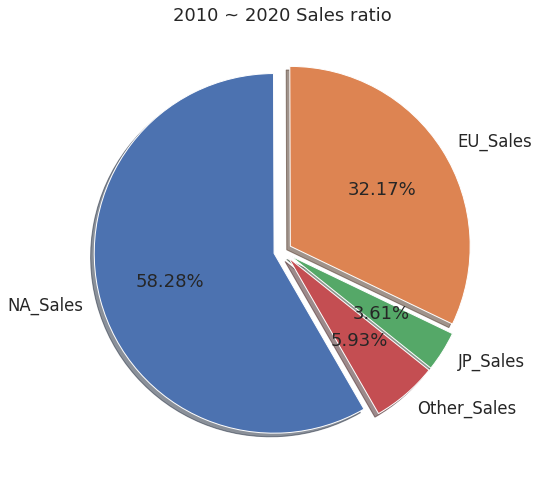

In [11]:
ratio_2010 = pie_chart.iloc[3, 0:4] / pie_chart.iloc[3, 4] * 100
labels = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
explode = [0.05, 0.05, 0.05, 0.05]

plt.pie(ratio_2010, labels = labels, autopct='%.2f%%', startangle=300, counterclock=False, explode=explode, shadow=True)
plt.title('2010 ~ 2020 Sales ratio')
plt.show()
# 2010~2020 출고량 비율을 보면 NA가 1위, EU가 2위로 가장 많이 차지하는 것을 볼 수 있고, JP는 점차 시장이 줄어들고 있고, 최근들어 EU가 성장하면서 NA와 EU가 전체의 80%이상을 차지하는 것을 볼 수 있다.

In [12]:
# 지역별 게임 장르에 따른 출고량 합산 비율

df_geo_genre_NA = pd.DataFrame(df.groupby('Genre').NA_Sales.sum())
df_geo_genre_EU = pd.DataFrame(df.groupby('Genre').EU_Sales.sum())
df_geo_genre_JP = pd.DataFrame(df.groupby('Genre').JP_Sales.sum())
df_geo_genre_OT = pd.DataFrame(df.groupby('Genre').Other_Sales.sum())

df_geo_genre = pd.concat([df_geo_genre_NA, df_geo_genre_EU, df_geo_genre_JP, df_geo_genre_OT], axis = 1)
df_geo_genre['NA_Sales'] = df_geo_genre['NA_Sales'] / df_geo_genre['NA_Sales'].sum() * 100
df_geo_genre['EU_Sales'] = df_geo_genre['EU_Sales'] / df_geo_genre['EU_Sales'].sum() * 100
df_geo_genre['JP_Sales'] = df_geo_genre['JP_Sales'] / df_geo_genre['JP_Sales'].sum() * 100
df_geo_genre['Other_Sales'] = df_geo_genre['Other_Sales'] / df_geo_genre['Other_Sales'].sum() * 100
df_geo_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,28.783509,20.477785,7.214754,18.035568
Adventure,1.018981,0.553599,0.401036,3.768334
Fighting,1.823491,4.136327,6.713436,6.729252
Misc,5.483521,8.214423,2.104596,6.191442
Platform,6.998450,22.195367,3.958318,6.460307
Puzzle,0.107410,1.194354,0.000282,0.673044
Racing,16.020465,5.942595,1.402998,5.653193
Role-Playing,2.145363,4.689982,59.015995,21.801964
Shooter,16.664240,17.826634,0.300773,9.959944


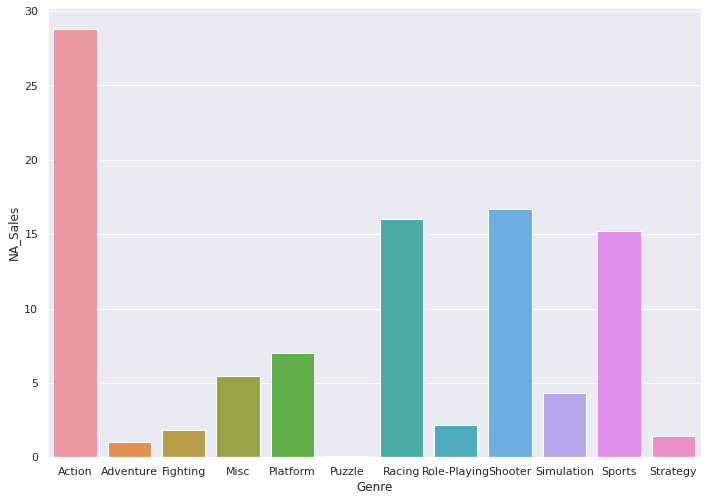

In [13]:


# NA지역에서 장르에 따른 출고량 비율

df_geo_genre['Genre'] = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
sns.set(font_scale=1)
sns.barplot(x = 'Genre', y = 'NA_Sales', data = df_geo_genre)

# NA지역의 장르에 따른 출고량 비율을 봤을 때, Action이 다른 장르에 비해 압도적으로 선호한다는 것을 볼 수 있다. 

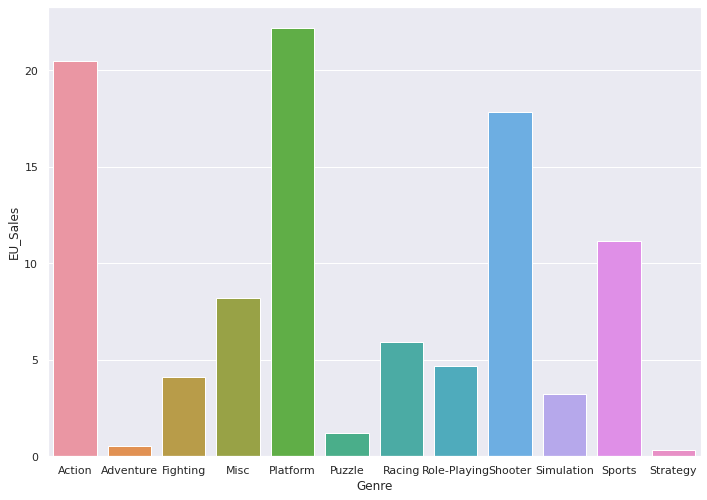

In [14]:
# EU지역에서 장르에 따른 출고량 비율

sns.barplot(x = 'Genre', y = 'EU_Sales', data = df_geo_genre)

# EU지역의 장르에 따른 출고량 비율을 봤을 때, Platform, Action 장르를 선호하는 것을 볼 수 있다.

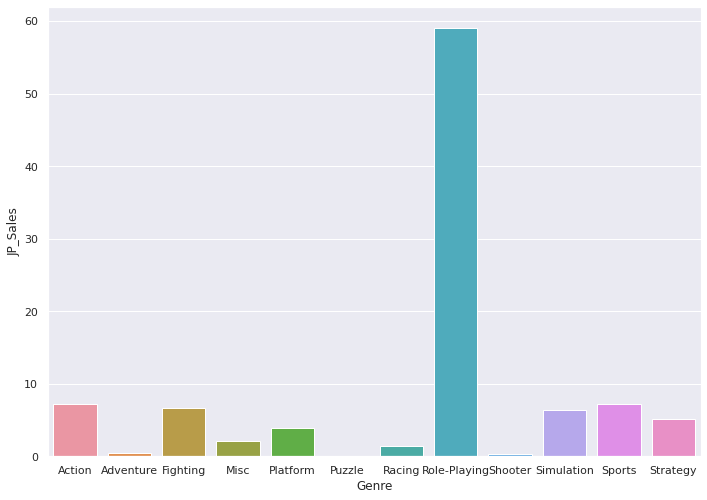

In [15]:
# JP지역에서 장르에 따른 출고량 비율

sns.barplot(x = 'Genre', y = 'JP_Sales', data = df_geo_genre)

# JP지역의 장르에 따른 출고량 비율을 봤을 때, Rore-Playing을 압도적으로 선호한다는 것을 볼 수 있다.

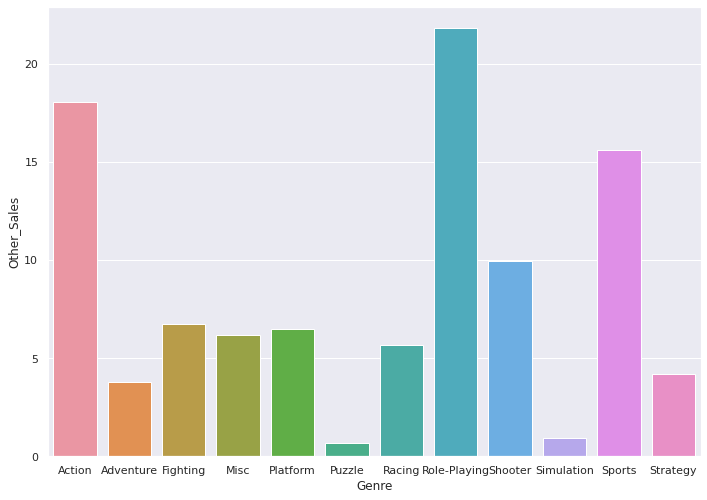

In [16]:
# Other지역에서 장르에 따른 출고량 비율

sns.barplot(x = 'Genre', y = 'Other_Sales', data = df_geo_genre)

# 그 외의 다른 지역은 Role-Playing과 Action을 선호한다. => 하지만 게임시장 규모에서 차지하는 비중이 적으니 고려대상은 아니다.

In [17]:

df['Year_Bining2'] = pd.cut(df['Year'], bins = [1979, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020])
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_Bining,Year_Bining2
13958,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,"(1979, 1990]","(1979, 1985]"
5604,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,"(1979, 1990]","(1979, 1985]"
14691,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,"(1979, 1990]","(1979, 1985]"
9045,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.0,0.00,"(1979, 1990]","(1979, 1985]"
12859,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,"(1979, 1990]","(1979, 1985]"


In [18]:
# 연도별 장르에 따른 개수

df_year_genre_count = df.groupby(['Year_Bining2', 'Genre']).Genre.count() 
df_year_genre_count = pd.DataFrame(df_year_genre_count)
df_year_genre_count

Genre
Year_Bining2 Genre              
(1979, 1985] Action           54
             Adventure         1
             Fighting          2
             Misc              7
             Platform         18
...                          ...
(2015, 2020] Role-Playing     42
             Shooter          32
             Simulation       10
             Sports           38
             Strategy         10

[96 rows x 1 columns]

In [19]:
df_year_genre_count_data = {'Year_Bining2': ['1980~1985']*12 + ['1985~1990']*12 + ['1990~1995']*12 + ['1995~2000']*12 + ['2000~2005']*12 + ['2005~2010']*12 + ['2010~2015']*12 + ['2015~2020']*12, 'Genre': list(df_geo_genre['Genre'])*8, 'count': list(df_year_genre_count.Genre.values)}

df_year_genre_count = pd.DataFrame(df_year_genre_count_data)

In [20]:
# 연도별 장르에 따른 개수, 출고량 데이터

df['sum_num'] = df.iloc[:, 5:9].sum(axis=1)

df_year_genre = df.groupby(['Year_Bining2', 'Genre']).sum_num.sum()

df_year_genre = pd.DataFrame(df_year_genre)
df_year_genre_count['sales'] = list(df_year_genre.sum_num.values)
df_year_genre_count['sales / count'] = df_year_genre_count['sales'] / df_year_genre_count['count']
df_year_genre_count

,Year_Bining2,Genre,count,sales,sales / count
0,1980~1985,Action,54,110029.75,2037.587963
1,1980~1985,Adventure,1,0.40,0.400000
2,1980~1985,Fighting,2,1.82,0.910000
3,1980~1985,Misc,7,7.16,1.022857
4,1980~1985,Platform,18,460062.28,25559.015556
...,...,...,...,...,...
91,2015~2020,Role-Playing,42,30006.76,714.446667
92,2015~2020,Shooter,32,1360016.81,42500.525312
93,2015~2020,Simulation,10,0.68,0.068000
94,2015~2020,Sports,38,280014.35,7368.798684


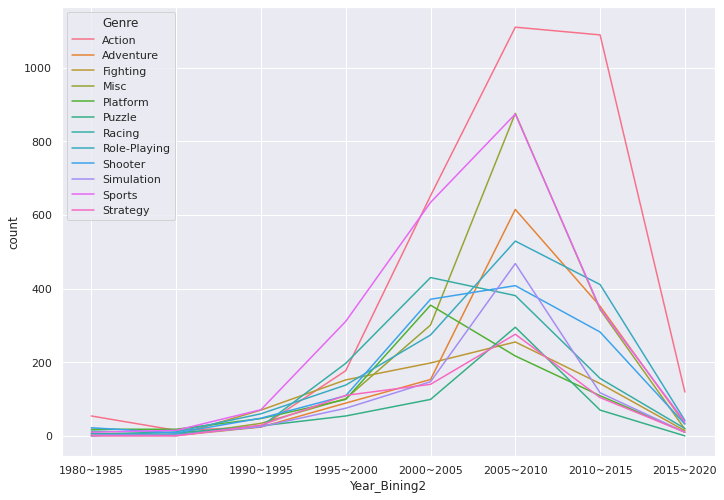

In [21]:
sns.lineplot(x = 'Year_Bining2', y = 'count', hue = 'Genre', data = df_year_genre_count)

# 5년 단위로 장르별 출시 개수 그래프를 나타낸 것으로, 1980~1995까지는 전체적으로 다양한 장르의 게임이 출시됐으며, 1995~2000 사이에는 특히 sports장르가 많이 출시됐다. 특히 2000년대 들어서 Action장르가 압도적 많은 출시를 볼 수 있고 최근까지도 많이 출시되고 있는 것을 볼 수 있다. 많은 출시가 이루어졌던 sports는  2010년대 들어 많이 감소한 것을 볼 수 있다. 

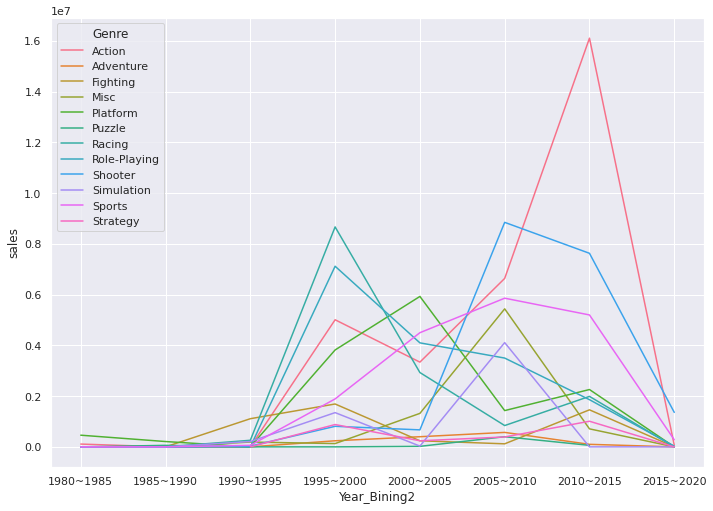

In [22]:
sns.lineplot(x = 'Year_Bining2', y = 'sales', hue = 'Genre', data = df_year_genre_count)

# 연도별 장르에 따른 출고량을 봤을 때, 1990년대 중반까지는 전체적으로 골고루 게임이 팔린 것을 볼 수 있고, 1995~2000에는 Role-playing과 shooter장르가 많이 팔린 것을 볼 수 있다. 2000~2005에는 이전 장르가 급격히 인기가 떨어지면서 이전부터 성장중이던 platform 장르가 그 자리를 대신한 거슬 볼 수 있고,  2005~2010에는 shooter가 이후 최근까지는 Action장르가 압도적으로 성장하여 많은 사람들에게 인기를 끌고 있는 것으로 보인다.

In [26]:
# 출고량 상위 30개의 데이터

df_sales_game30 = df.nlargest(30, 'sum_num')
df_sales_game30 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_Bining,Year_Bining2,sum_num
10695,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9630000.00,5.31,0.06,1.38,"(2010, 2020]","(2010, 2015]",9630006.75
12337,Halo: Reach,X360,2010.0,Shooter,Microsoft Game Studios,7030000.00,1.98,0.08,0.78,"(2000, 2010]","(2005, 2010]",7030002.84
568,Mario Kart 64,N64,1996.0,Racing,Nintendo,5550000.00,1.94,2.23,0.15,"(1990, 2000]","(1995, 2000]",5550004.32
1930,The Legend of Zelda: Ocarina of Time,N64,1998.0,Action,Nintendo,4100000.00,1.89,1.45,0.16,"(1990, 2000]","(1995, 2000]",4100003.50
1780,Pokemon FireRed/Pokemon LeafGreen,GBA,2004.0,Role-Playing,Nintendo,4.34,2.65,3150000.00,0.35,"(2000, 2010]","(2000, 2005]",3150007.34
8363,Pokémon Yellow: Special Pikachu Edition,GB,1998.0,Role-Playing,Nintendo,5.89,5.04,3120000.00,0.59,"(1990, 2000]","(1995, 2000]",3120011.52
9640,Super Mario Bros. 3,GBA,2003.0,Platform,Nintendo,2930000.00,1.25,0.83,0.20,"(2000, 2010]","(2000, 2005]",2930002.28
7708,FIFA 14,X360,2013.0,Sports,Electronic Arts,0.92,2930000.00,0.01,0.46,"(2010, 2020]","(2010, 2015]",2930001.39
6322,Super Mario 64,N64,1996.0,Platform,Nintendo,6.91,2850000.00,1.91,0.23,"(1990, 2000]","(1995, 2000]",2850009.05
3517,Final Fantasy IX,PS,2000.0,Role-Playing,SquareSoft,1.62,0.77,2780000.00,0.14,"(1990, 2000]","(1995, 2000]",2780002.53


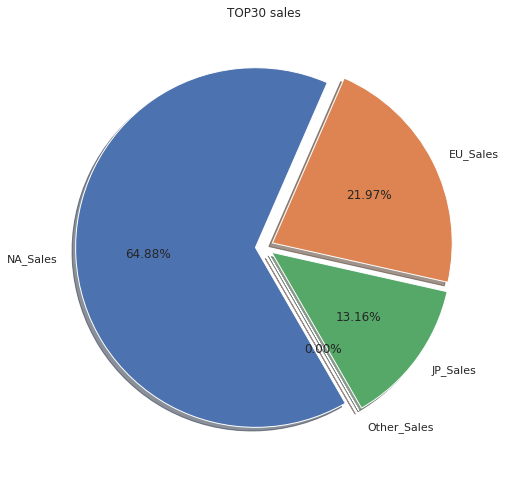

In [27]:
a = df_sales_game30['NA_Sales'].sum()
b = df_sales_game30['EU_Sales'].sum()
c = df_sales_game30['JP_Sales'].sum()
d = df_sales_game30['Other_Sales'].sum()

abcd_sum = a+b+c+d

a_ratio = a / abcd_sum
b_ratio = b / abcd_sum
c_ratio = c / abcd_sum
d_ratio = d / abcd_sum

abcd_ratio = [a_ratio, b_ratio, c_ratio, d_ratio]
labels = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
explode = [0.05, 0.05, 0.05, 0.05]

plt.pie(abcd_ratio, labels = labels, autopct='%.2f%%', startangle=300, counterclock=False, explode=explode, shadow=True)
plt.title('TOP30 sales')
plt.show()

# 출고량 상위 30개 게임에 대해서 지역에 따른 출고량 비율을 봤을 때, NA와 EU가 전체의 80%이상 차지하는 것을 볼 수 있으며, 특히 NA가 약 65%를 차지한다.

In [28]:
# 출고량 상위 30개의 데이터를 출고량에 대해서 표준화

import numpy as np
from sklearn.preprocessing import StandardScaler

df_sales_game30_scaler = df_sales_game30
df_sales_game30_scaler.iloc[:, 5:9] = StandardScaler().fit_transform(df_sales_game30_scaler.iloc[:, 5:9])

df_sales_game30_scaler = df_sales_game30_scaler.reset_index().drop('index', axis = 1)
df_sales_game30_scaler

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_Bining,Year_Bining2,sum_num
0,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,3.544380,-0.569878,-0.368416,3.158687,"(2010, 2020]","(2010, 2015]",9630006.75
1,Halo: Reach,X360,2010.0,Shooter,Microsoft Game Studios,2.387878,-0.569881,-0.368416,1.250755,"(2000, 2010]","(2005, 2010]",7030002.84
2,Mario Kart 64,N64,1996.0,Racing,Nintendo,1.729562,-0.569881,-0.368413,-0.752573,"(1990, 2000]","(1995, 2000]",5550004.32
3,The Legend of Zelda: Ocarina of Time,N64,1998.0,Action,Nintendo,1.084590,-0.569881,-0.368414,-0.720774,"(1990, 2000]","(1995, 2000]",4100003.50
4,Pokemon FireRed/Pokemon LeafGreen,GBA,2004.0,Role-Playing,Nintendo,-0.739122,-0.569880,3.075231,-0.116596,"(2000, 2010]","(2000, 2005]",3150007.34
5,Pokémon Yellow: Special Pikachu Edition,GB,1998.0,Role-Playing,Nintendo,-0.739121,-0.569878,3.042434,0.646577,"(1990, 2000]","(1995, 2000]",3120011.52
6,Super Mario Bros. 3,GBA,2003.0,Platform,Nintendo,0.564165,-0.569882,-0.368415,-0.593579,"(2000, 2010]","(2000, 2005]",2930002.28
7,FIFA 14,X360,2013.0,Sports,Electronic Arts,-0.739123,2.397689,-0.368416,0.233192,"(2010, 2020]","(2010, 2015]",2930001.39
8,Super Mario 64,N64,1996.0,Platform,Nintendo,-0.739120,2.316663,-0.368414,-0.498182,"(1990, 2000]","(1995, 2000]",2850009.05
9,Final Fantasy IX,PS,2000.0,Role-Playing,SquareSoft,-0.739123,-0.569882,2.670739,-0.784372,"(1990, 2000]","(1995, 2000]",2780002.53


In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # 2개의 PC로 출고량에 대해서 PCA진행

df_sales_game30_scaler_pca = df_sales_game30_scaler.iloc[:, 5:9]
pca.fit(df_sales_game30_scaler_pca)
df_sales_game30_scaler_pca = pca.transform(df_sales_game30_scaler_pca)

df_sales_game30_scaler_pca_data = pd.DataFrame(data = df_sales_game30_scaler_pca, columns = ['PC1', 'PC2'])

pca_var_ratio = pca.explained_variance_ratio_

df_sales_game30_scaler_pca_data['Genre'] = df_sales_game30_scaler['Genre']
df_sales_game30_scaler_pca_data['Platform'] = df_sales_game30_scaler['Platform']
df_sales_game30_scaler_pca_data['Publisher'] = df_sales_game30_scaler['Publisher']
df_sales_game30_scaler_pca_data['Year'] = df_sales_game30_scaler['Year']
df_sales_game30_scaler_pca_data

,PC1,PC2,Genre,Platform,Publisher,Year
0,4.338358,-0.875786,Action,X360,Take-Two Interactive,2013.0
1,2.477677,-1.018225,Shooter,X360,Microsoft Game Studios,2010.0
2,0.897839,-1.410507,Racing,N64,Nintendo,1996.0
3,0.482192,-1.118160,Action,N64,Nintendo,1998.0
4,-2.035080,-0.717191,Role-Playing,GBA,Nintendo,2004.0
5,-1.586312,-0.452554,Role-Playing,GB,Nintendo,1998.0
6,0.204444,-0.847819,Platform,GBA,Nintendo,2003.0
7,-0.136061,2.419700,Sports,X360,Electronic Arts,2013.0
8,-0.553034,2.105544,Platform,N64,Nintendo,1996.0
9,-2.222217,-0.873254,Role-Playing,PS,SquareSoft,2000.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


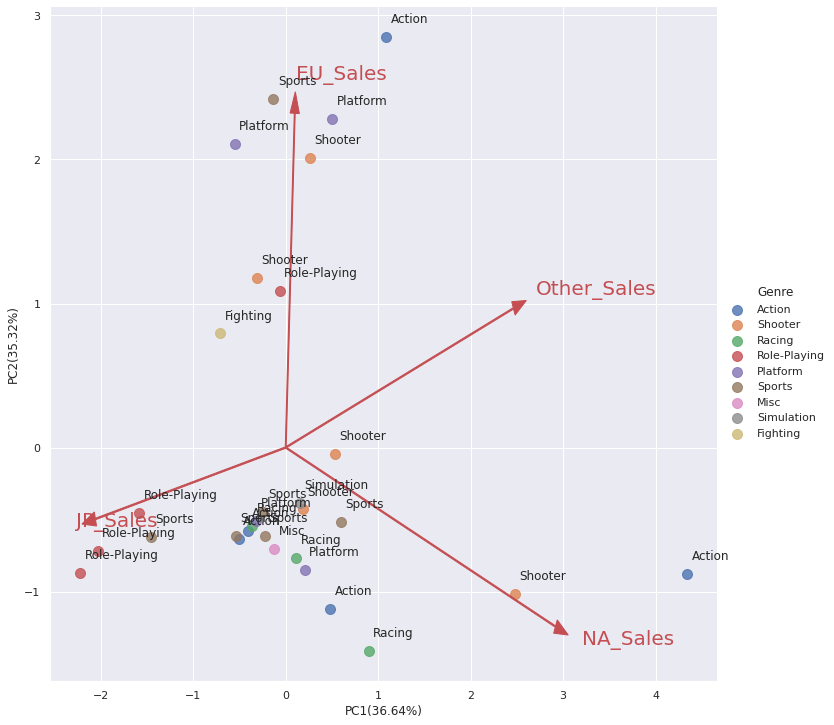

In [30]:
sns.lmplot('PC1', 'PC2', data = df_sales_game30_scaler_pca_data, fit_reg = False, hue = 'Genre', size = 10, scatter_kws={"s": 100})

xvector = pca.components_[0]
yvector = pca.components_[1]

xs = df_sales_game30_scaler_pca[:,0]
ys = df_sales_game30_scaler_pca[:,1]

for i in range(len(xvector)):

    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys), color='r', width=0.01, head_width=0.1)
    plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1, list(df_sales_game30_scaler.columns[5:9])[i], color='r', fontsize=20)


for i in range(len(df_sales_game30_scaler_pca_data.index)):

    plt.text(df_sales_game30_scaler_pca_data.loc[i, 'PC1']+0.05, df_sales_game30_scaler_pca_data.loc[i, 'PC2']+0.1, list(df_sales_game30_scaler_pca_data['Genre'])[i])


plt.xlabel('PC1' + f'({str((pca_var_ratio[0]*100).round(2))}%)')
plt.ylabel('PC2' + f'({str((pca_var_ratio[1]*100).round(2))}%)')

plt.show()

# 출고량 상위 30개의 게임을 골라 PCA를 진행하였고, 각 게임에 대해서 장르를 표기해봤다. 위 그래프에서 해당 화살표 방향으로 갈수록 해당 변수의 요소를 많이 포함하고 있다고 볼 수 있다. 
# 지역 중에서 전체 출고량에 상당부분을 차지하는 NA와 EU에 대해서 살펴보면 
# NA에서는 Action 2개, shooter 1개, racing 1개가 특히 잘 팔린 것을 볼 수 있고,
# EU에서는 Action, Platform, shooter, sports가 많이 영향을 주는 것으로 볼 수 있다.   


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


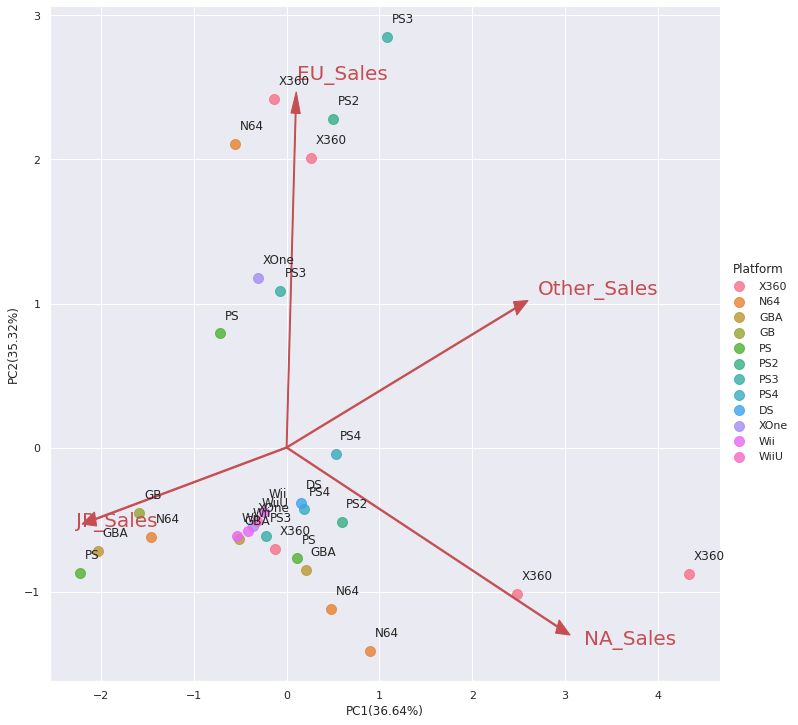

In [31]:
sns.lmplot('PC1', 'PC2', data = df_sales_game30_scaler_pca_data, fit_reg = False, hue = 'Platform', size = 10, scatter_kws={"s": 100})

xvector = pca.components_[0]
yvector = pca.components_[1]

xs = df_sales_game30_scaler_pca[:,0]
ys = df_sales_game30_scaler_pca[:,1]

for i in range(len(xvector)):

    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys), color='r', width=0.01, head_width=0.1)
    plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1, list(df_sales_game30_scaler.columns[5:9])[i], color='r', fontsize=20)

for i in range(len(df_sales_game30_scaler_pca_data.index)):

    plt.text(df_sales_game30_scaler_pca_data.loc[i, 'PC1']+0.05, df_sales_game30_scaler_pca_data.loc[i, 'PC2']+0.1, list(df_sales_game30_scaler_pca_data['Platform'])[i])

plt.xlabel('PC1' + f'({str((pca_var_ratio[0]*100).round(2))}%)')
plt.ylabel('PC2' + f'({str((pca_var_ratio[1]*100).round(2))}%)')

plt.show()

# 이번에는 PCA 그래프에서 Platform에 대해서 표시해봤습니다. 
# NA와 EU에 대해서 보면, 특히 X360과 N64가 NA와 EU지역에서 출고량에 대해서 상당부분 좋은 결과를 낸 것으로 보인다.

In [33]:
# 최근 15년간 Action 장르와 Shooter 장르 데이터

year_list = df['Year_Bining2'].isin(['(2005, 2010], (2010, 2015]', '(2015, 2020]'])

genre_list = df['Genre'].isin(['Action', 'Shooter', 'Platform'])
df_action_shooter_platform = df[genre_list]
df_action_shooter_platform = df_action_shooter_platform[df['Year'] > 2005] 


df_action_shooter_platform

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_Bining,Year_Bining2,sum_num
12662,Raw Danger! (JP sales),PS2,2006.0,Action,505 Games,0.00,0.00,0.06,0.00,"(2000, 2010]","(2005, 2010]",0.06
9903,Turn It Around,DS,2006.0,Action,505 Games,0.03,0.00,0.00,0.00,"(2000, 2010]","(2005, 2010]",0.03
3232,Miami Vice: The Game,PSP,2006.0,Shooter,Activision,0.06,0.00,0.00,0.00,"(2000, 2010]","(2005, 2010]",0.06
16031,LEGO Star Wars II: The Original Trilogy,X360,2006.0,Action,LucasArts,0.55,0.04,0.00,0.05,"(2000, 2010]","(2005, 2010]",0.64
7847,Disney's American Dragon Jake Long: Attack of ...,DS,2006.0,Action,Disney Interactive Studios,0.15,0.00,0.00,0.01,"(2000, 2010]","(2005, 2010]",0.16
...,...,...,...,...,...,...,...,...,...,...,...,...
6215,Aegis of Earth: Protonovus Assault,PSV,2016.0,Action,PQube,0.02,0.01,0.00,0.01,"(2010, 2020]","(2015, 2020]",0.04
12418,Hitman (2016),XOne,2016.0,Action,Square Enix,0.00,0.01,0.00,0.00,"(2010, 2020]","(2015, 2020]",0.01
1465,Dragon Quest Heroes II: Twin Kings and the Pro...,PS4,2016.0,Action,Square Enix,0.00,0.00,0.28,0.00,"(2010, 2020]","(2015, 2020]",0.28
12368,Dynasty Warriors: Eiketsuden,PS4,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,"(2010, 2020]","(2015, 2020]",0.01


In [34]:

df_action = df_action_shooter_platform[df_action_shooter_platform['Genre'] == 'Action']

df_action = df_action.reset_index().drop('index', axis = 1)
df_action_count = df_action.groupby('Platform')['Platform'].count()

df_action

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_Bining,Year_Bining2,sum_num
0,Raw Danger! (JP sales),PS2,2006.0,Action,505 Games,0.00,0.00,0.06,0.00,"(2000, 2010]","(2005, 2010]",0.06
1,Turn It Around,DS,2006.0,Action,505 Games,0.03,0.00,0.00,0.00,"(2000, 2010]","(2005, 2010]",0.03
2,LEGO Star Wars II: The Original Trilogy,X360,2006.0,Action,LucasArts,0.55,0.04,0.00,0.05,"(2000, 2010]","(2005, 2010]",0.64
3,Disney's American Dragon Jake Long: Attack of ...,DS,2006.0,Action,Disney Interactive Studios,0.15,0.00,0.00,0.01,"(2000, 2010]","(2005, 2010]",0.16
4,The Settlers II 10th Anniversary,PC,2006.0,Action,Ubisoft,0.00,0.02,0.00,0.00,"(2000, 2010]","(2005, 2010]",0.02
...,...,...,...,...,...,...,...,...,...,...,...,...
2313,Aegis of Earth: Protonovus Assault,PSV,2016.0,Action,PQube,0.02,0.01,0.00,0.01,"(2010, 2020]","(2015, 2020]",0.04
2314,Hitman (2016),XOne,2016.0,Action,Square Enix,0.00,0.01,0.00,0.00,"(2010, 2020]","(2015, 2020]",0.01
2315,Dragon Quest Heroes II: Twin Kings and the Pro...,PS4,2016.0,Action,Square Enix,0.00,0.00,0.28,0.00,"(2010, 2020]","(2015, 2020]",0.28
2316,Dynasty Warriors: Eiketsuden,PS4,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,"(2010, 2020]","(2015, 2020]",0.01


In [35]:
df_shooter = df_action_shooter_platform[df_action_shooter_platform['Genre'] == 'Shooter']

df_shooter = df_shooter.reset_index().drop('index', axis = 1)
df_shooter_count = df_shooter.groupby('Platform')['Platform'].count()
df_shooter

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_Bining,Year_Bining2,sum_num
0,Miami Vice: The Game,PSP,2006.0,Shooter,Activision,0.06,0.00,0.00,0.00,"(2000, 2010]","(2005, 2010]",0.06
1,Far Cry Vengeance,Wii,2006.0,Shooter,Ubisoft,0.06,0.01,0.00,0.01,"(2000, 2010]","(2005, 2010]",0.08
2,Eureka Seven Vol. 2: The New Vision,PS2,2006.0,Shooter,Namco Bandai Games,0.00,0.00,0.02,0.00,"(2000, 2010]","(2005, 2010]",0.02
3,Lost Planet: Extreme Condition,X360,2006.0,Shooter,Capcom,1.09,0.04,0.10,0.11,"(2000, 2010]","(2005, 2010]",1.34
4,Metroid Prime Hunters,DS,2006.0,Shooter,Nintendo,0.58,0.04,0.11,0.06,"(2000, 2010]","(2005, 2010]",0.79
...,...,...,...,...,...,...,...,...,...,...,...,...
717,Tom Clancy's The Division,PC,2016.0,Shooter,Ubisoft,0.20,0.14,0.00,0.03,"(2010, 2020]","(2015, 2020]",0.37
718,Resident Evil 6,XOne,2016.0,Shooter,Capcom,0.03,0.00,0.00,0.00,"(2010, 2020]","(2015, 2020]",0.03
719,Destiny: The Collection,XOne,2016.0,Shooter,Activision,0.01,0.02,0.00,0.00,"(2010, 2020]","(2015, 2020]",0.03
720,Plants vs. Zombies: Garden Warfare 2,PC,2016.0,Shooter,Electronic Arts,0.00,0.04,0.00,0.00,"(2010, 2020]","(2015, 2020]",0.04


In [36]:
df_platform = df_action_shooter_platform[df_action_shooter_platform['Genre'] == 'Platform']

df_platform = df_platform.reset_index().drop('index', axis = 1)
df_platform_count = df_platform.groupby('Platform')['Platform'].count()
df_platform

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Year_Bining,Year_Bining2,sum_num
0,Super Monkey Ball Adventure,PSP,2006.0,Platform,Sega,0.05,0.02,0.00,0.01,"(2000, 2010]","(2005, 2010]",0.08
1,Over the Hedge,XB,2006.0,Platform,Activision,0.07,0.02,0.00,0.00,"(2000, 2010]","(2005, 2010]",0.09
2,The Ant Bully,GBA,2006.0,Platform,Midway Games,0.03,0.01,0.00,0.00,"(2000, 2010]","(2005, 2010]",0.04
3,The Legend of Spyro: A New Beginning,DS,2006.0,Platform,Vivendi Games,0.34,0.01,0.00,0.03,"(2000, 2010]","(2005, 2010]",0.38
4,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,"(2000, 2010]","(2005, 2010]",30.01
...,...,...,...,...,...,...,...,...,...,...,...,...
331,Mega Man Legacy Collection,PS4,2016.0,Platform,Capcom,0.06,0.00,0.00,0.01,"(2010, 2020]","(2015, 2020]",0.07
332,Ratchet & Clank (2016),PS4,2016.0,Platform,Sony Computer Entertainment,0.32,0.64,0.04,0.18,"(2010, 2020]","(2015, 2020]",1.18
333,Mighty No. 9,WiiU,2016.0,Platform,Deep Silver,0.01,0.01,0.00,0.00,"(2010, 2020]","(2015, 2020]",0.02
334,Mirror's Edge Catalyst,PS4,2016.0,Platform,Electronic Arts,0.10,0.14,0.02,0.06,"(2010, 2020]","(2015, 2020]",0.32


In [37]:
# 15년간 장르별 출고량 합계

df_action_shooter_platform_sum = df_action_shooter_platform.groupby(['Year_Bining2', 'Genre'])['sum_num'].sum()
df_action_shooter_platform_sum = pd.DataFrame(df_action_shooter_platform_sum).dropna()
df_action_shooter_platform_sum

sum_num
Year_Bining2 Genre                
(2005, 2010] Action     6640557.12
             Platform   1430192.38
             Shooter    8850307.17
(2010, 2015] Action    16110516.14
             Platform   2260084.41
             Shooter    7630359.40
(2015, 2020] Action       70019.78
             Platform         2.08
             Shooter    1360016.81

In [38]:
# 15년간 장르별 출시수 합계

df_action_shooter_platform_count = df_action_shooter_platform.groupby(['Year_Bining2', 'Genre'])['Genre'].count()
df_action_shooter_platform_count = pd.DataFrame(df_action_shooter_platform_count)
df_action_shooter_platform_count

Genre
Year_Bining2 Genre          
(1979, 1985] Action        0
             Platform      0
             Shooter       0
(1985, 1990] Action        0
             Platform      0
             Shooter       0
(1990, 1995] Action        0
             Platform      0
             Shooter       0
(1995, 2000] Action        0
             Platform      0
             Shooter       0
(2000, 2005] Action        0
             Platform      0
             Shooter       0
(2005, 2010] Action     1110
             Platform    217
             Shooter     408
(2010, 2015] Action     1089
             Platform    109
             Shooter     282
(2015, 2020] Action      119
             Platform     10
             Shooter      32

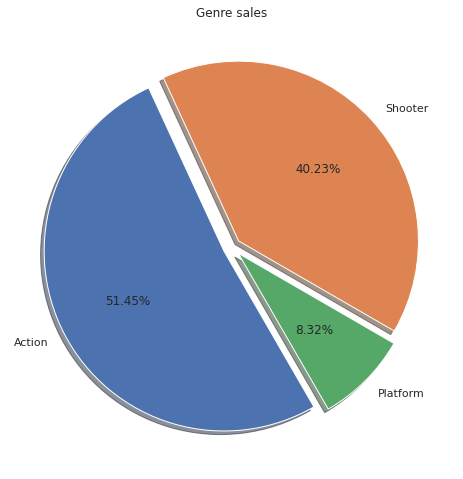

In [39]:
# 15년간의 3가지 장르에 대한 출고량 비율

A_S_F_sum = df_action['sum_num'].sum() + df_shooter['sum_num'].sum() + df_platform['sum_num'].sum()
Action_ratio = df_action['sum_num'].sum() / A_S_F_sum
Shooter_ratio = df_shooter['sum_num'].sum() / A_S_F_sum
Platform_ratio = df_platform['sum_num'].sum() / A_S_F_sum

A_S_F_ratio = [Action_ratio, Shooter_ratio, Platform_ratio]
labels = ['Action', 'Shooter', 'Platform']
explode = [0.05, 0.05, 0.05]

plt.pie(A_S_F_ratio, labels = labels, autopct='%.2f%%', startangle=300, counterclock=False, explode=explode, shadow=True)
plt.title('Genre sales')
plt.show()

# 15년간 장르별 출고량 비율을 봤을 때, Action과 Shooter가 대부분을 차지하고 Action이 shooter보다 더 큰 부분을 차지한다.

In [50]:
df_action_shooter_platform_count_sum = pd.DataFrame({"Year": ['2005~2010']*3 + ['2010~2015']*3+ ['2015~2020']*3, 'Genre': ['Action', 'Platform', 'Shooter']*3, 'count': pd.DataFrame(df_action_shooter_platform_count.values[-9:]).iloc[:,0], 'sum': pd.DataFrame(df_action_shooter_platform_sum.values).iloc[:,0]})
df_action_shooter_platform_count_sum['count / sales'] = df_action_shooter_platform_count_sum['sum'] / df_action_shooter_platform_count_sum['count']

df_action_shooter_platform_count_sum

,Year,Genre,count,sum,count / sales
0,2005~2010,Action,1110,6640557.12,5982.483892
1,2005~2010,Platform,217,1430192.38,6590.748295
2,2005~2010,Shooter,408,8850307.17,21691.929338
3,2010~2015,Action,1089,16110516.14,14793.862388
4,2010~2015,Platform,109,2260084.41,20734.719358
5,2010~2015,Shooter,282,7630359.40,27058.012057
6,2015~2020,Action,119,70019.78,588.401513
7,2015~2020,Platform,10,2.08,0.208000
8,2015~2020,Shooter,32,1360016.81,42500.525312


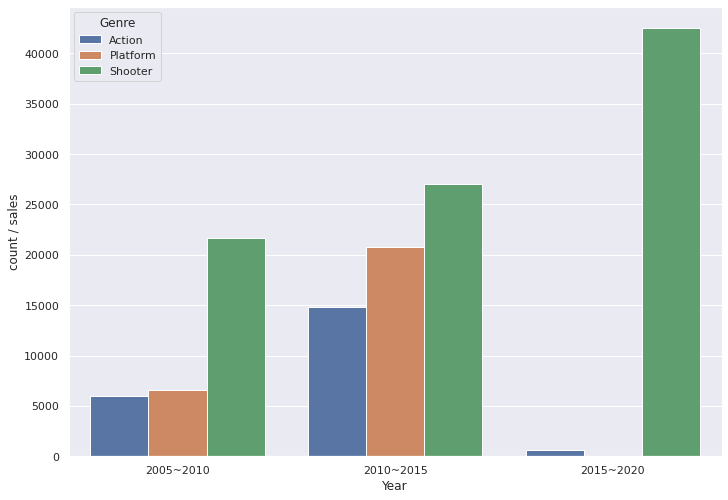

In [51]:
# 최근 15년간 Action, platform, shooter 장르에 대한 출시수당 출고량을 보면 전체연도를 통틀어 
# shooter가 압도적으로 높게 나오는 것을 볼 수 있다. 이를 통해 알 수 있는 것은 최근에는 Action이 유행이고
# 압도적으로 많은 출고량이 나오지만 그만큼 출시되는 게임도 많아서 경쟁이 치열한 것으로 보이고, 상대적으로 shooter는
# 게임출시가 얼마안되지만, 어느정도의 많은 출시량을 보이고 있다는 것을 알 수 있다. 

sns.barplot(x = 'Year', y = 'count / sales', hue = 'Genre', data = df_action_shooter_platform_count_sum)




In [42]:
# Action, Shooter, Platform에 대한 기술통계치

da = df_action.describe()
ds = df_shooter.describe()
dp = df_platform.describe()


,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,sum_num
count,2318.000000,2.318000e+03,2.318000e+03,2318.000000,2318.000000,2.318000e+03
mean,2010.801553,6.712904e+03,2.234835e+03,349.481799,547.943934,9.845165e+03
std,2.989892,2.041843e+05,5.663725e+04,7610.979657,10257.875651,2.121691e+05
min,2006.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000e-02
25%,2008.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,6.000000e-02
50%,2011.000000,9.000000e-02,3.000000e-02,0.000000,0.010000,1.800000e-01
75%,2013.000000,2.300000e-01,1.500000e-01,0.040000,0.050000,5.000000e-01
max,2017.000000,9.630000e+06,2.560000e+06,330000.000000,340000.000000,9.630007e+06


In [52]:
from scipy import stats

stats.ttest_ind(df_action['sum_num'], df_shooter['sum_num'], alternative = 'greater')

# 최근 15년간 action과 shooter에 대해서 출고량을 two sample t test를 진행했다. action의 평균 출고량이 shooter의 평균 출고량보다 크다고 대립가설을 세우고 진행한 결과
# p-value가 매우 큰 값이 나왔고, 따라서 대립가설을 채택할 수 없게되며, 반대로 action의 평균 출고량이 shooter보다 작다는 가정이 맞게된다.




Ttest_indResult(statistic=-1.48596975829651, pvalue=0.9313045589624372)

In [46]:
da_m = pd.DataFrame(da.iloc[3:8, -1])
da_m = da_m.rename({'sum_num' : 'Action'}, axis = 1)

ds_m = pd.DataFrame(ds.iloc[3:8, -1])
ds_m = ds_m.rename({'sum_num' : 'Shooter'}, axis = 1)

da_ds_m = da_m
da_ds_m['Shooter'] = ds_m['Shooter']
da_ds_m

# 출고량 최댓값은 Action이 많이 크지만, 그 이외의 범위에 대해서는 shooter가 더 크다.

,Action,Shooter
min,0.01,1.000000e-02
25%,0.06,8.000000e-02
50%,0.18,3.300000e-01
75%,0.50,9.775000e-01
max,9630006.75,7.030003e+06
